In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.metrics import confusion_matrix, log_loss, classification_report, roc_curve, auc

from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [103]:
X, y = pd.DataFrame(iris['data'], columns=iris['feature_names']), pd.DataFrame(iris['target'], columns=['y'])

In [104]:
df = pd.concat([X, y], axis=1)

## 일변량, 이변량 탐색

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# 결측치 없고 모두 수치형 데이터
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
# 모두 연속형
X.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [12]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1440x720 with 0 Axes>

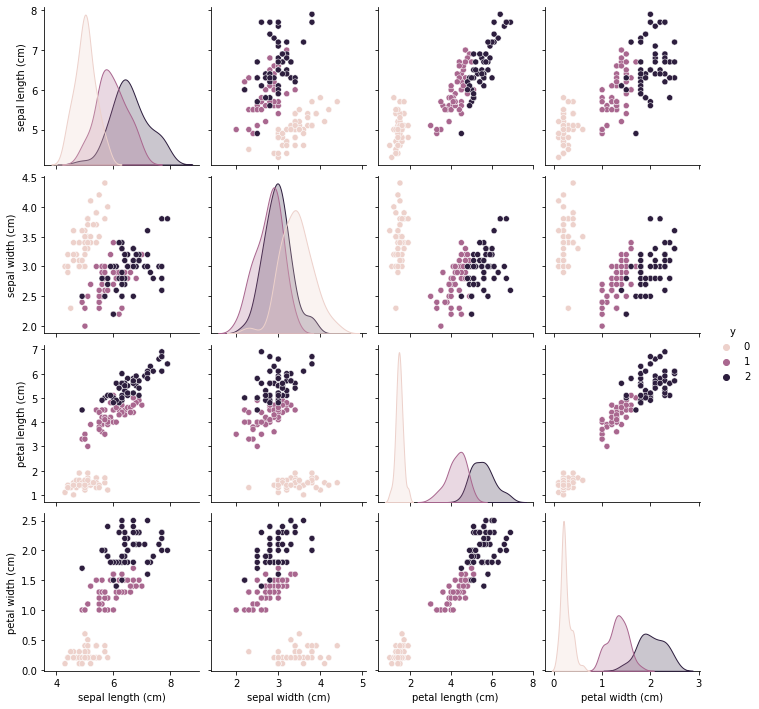

In [27]:
plt.figure(figsize=(20, 10))
sns.pairplot(pd.concat([X, y], axis=1), hue='y')

In [ ]:
'''
pairplot을 통해 종속변수에 따른 일변량 분포와 이변량 산점도를 한번에 확인해보았다.
확인 결과 petal length와 petal width를 사용하면 0번을 구분할 수 있다는 사실을 알 수 있다.
'''

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distribut

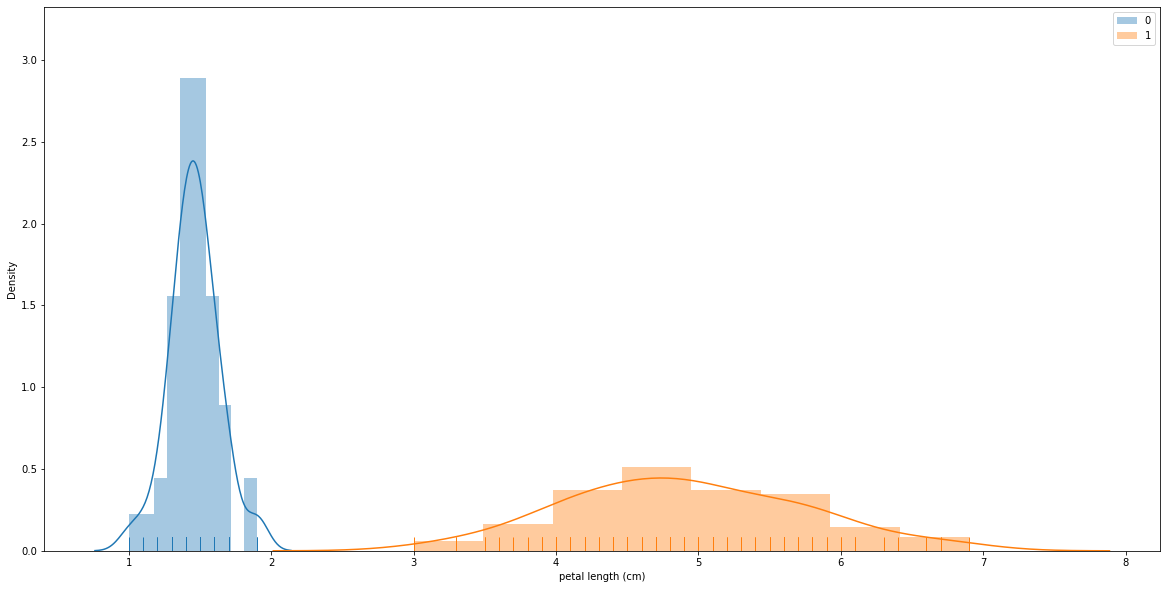

In [44]:
plt.figure(figsize=(20, 10))
sns.distplot(df[df.y == 0]['petal length (cm)'], hist=True, rug=True, label='0')
sns.distplot(df[df.y != 0]['petal length (cm)'], hist=True, rug=True, label='1')
plt.legend()
plt.show()

In [105]:
df = df[df['y'] != 2]

In [106]:
df = pd.concat([df['sepal length (cm)'], df['y']], axis=1)

In [107]:
df = df.rename(columns={'sepal length (cm)': 'sepal_length'})

In [108]:
# 로지스틱으로 이진분류를 해본다. 따라서 데이터를 다르게 구성한다. 로지스틱은 반드시 종속변수가 0과 1로 구성되어야 한다.
X, y = df.iloc[:, :-1], df[['y']]

In [ ]:
'''
statsmodels를 이용한 로지스틱 회귀
'''

In [111]:
# 로지스틱은 선형회귀와 모델을 만들고 학습시키는 과정이 동일하다.
model = sm.Logit(y, sm.add_constant(X))
rlt = model.fit()

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8


In [112]:
rlt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.5368
Time:                        10:08:29   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113
================================================================================
"""

In [ ]:
'''
해석:
MLE를 사용해서 로지스틱의 가중치를 최적화.
맥파든 알 스퀘어: 0.5368
로그우도값: -32.106
귀무모델의 로그우도값: -69.315
LLR pvalue가 0.05보다 작으므로 설명력은 유의.
상수항, sepal_lengh 모두 z검정 상 유의.
'''

In [123]:
# 모델
predict_y = rlt.predict(sm.add_constant(X)) >= 0.5

In [124]:
confusion_matrix(y, predict_y)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [128]:
print(classification_report(y, predict_y))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



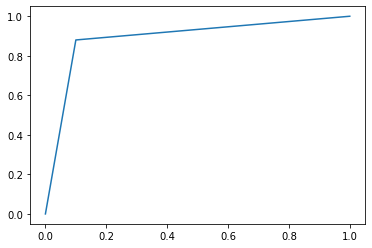

In [132]:
fpr, tpr, thresholds = roc_curve(y, predict_y)
plt.plot(fpr, tpr)
plt.show()

In [133]:
auc(fpr, tpr)

0.89

In [ ]:
'''
sklearn을 이용한 로지스틱 회귀
'''

In [134]:
model = LogisticRegression().fit(X, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [136]:
pred_y = model.predict(X)

In [137]:
confusion_matrix(y, pred_y)

array([[45,  5],
       [ 6, 44]], dtype=int64)

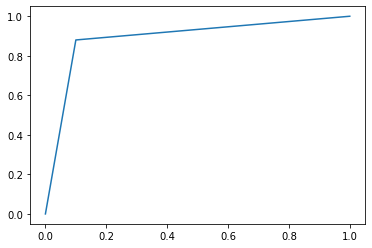

In [139]:
fpr, tpr, thresholds = roc_curve(y, pred_y)
plt.plot(fpr, tpr)
plt.show()

In [140]:
auc(fpr, tpr)

0.89

In [ ]:
'''
로지스틱 예제2
'''

In [142]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df = data_med.data
df.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


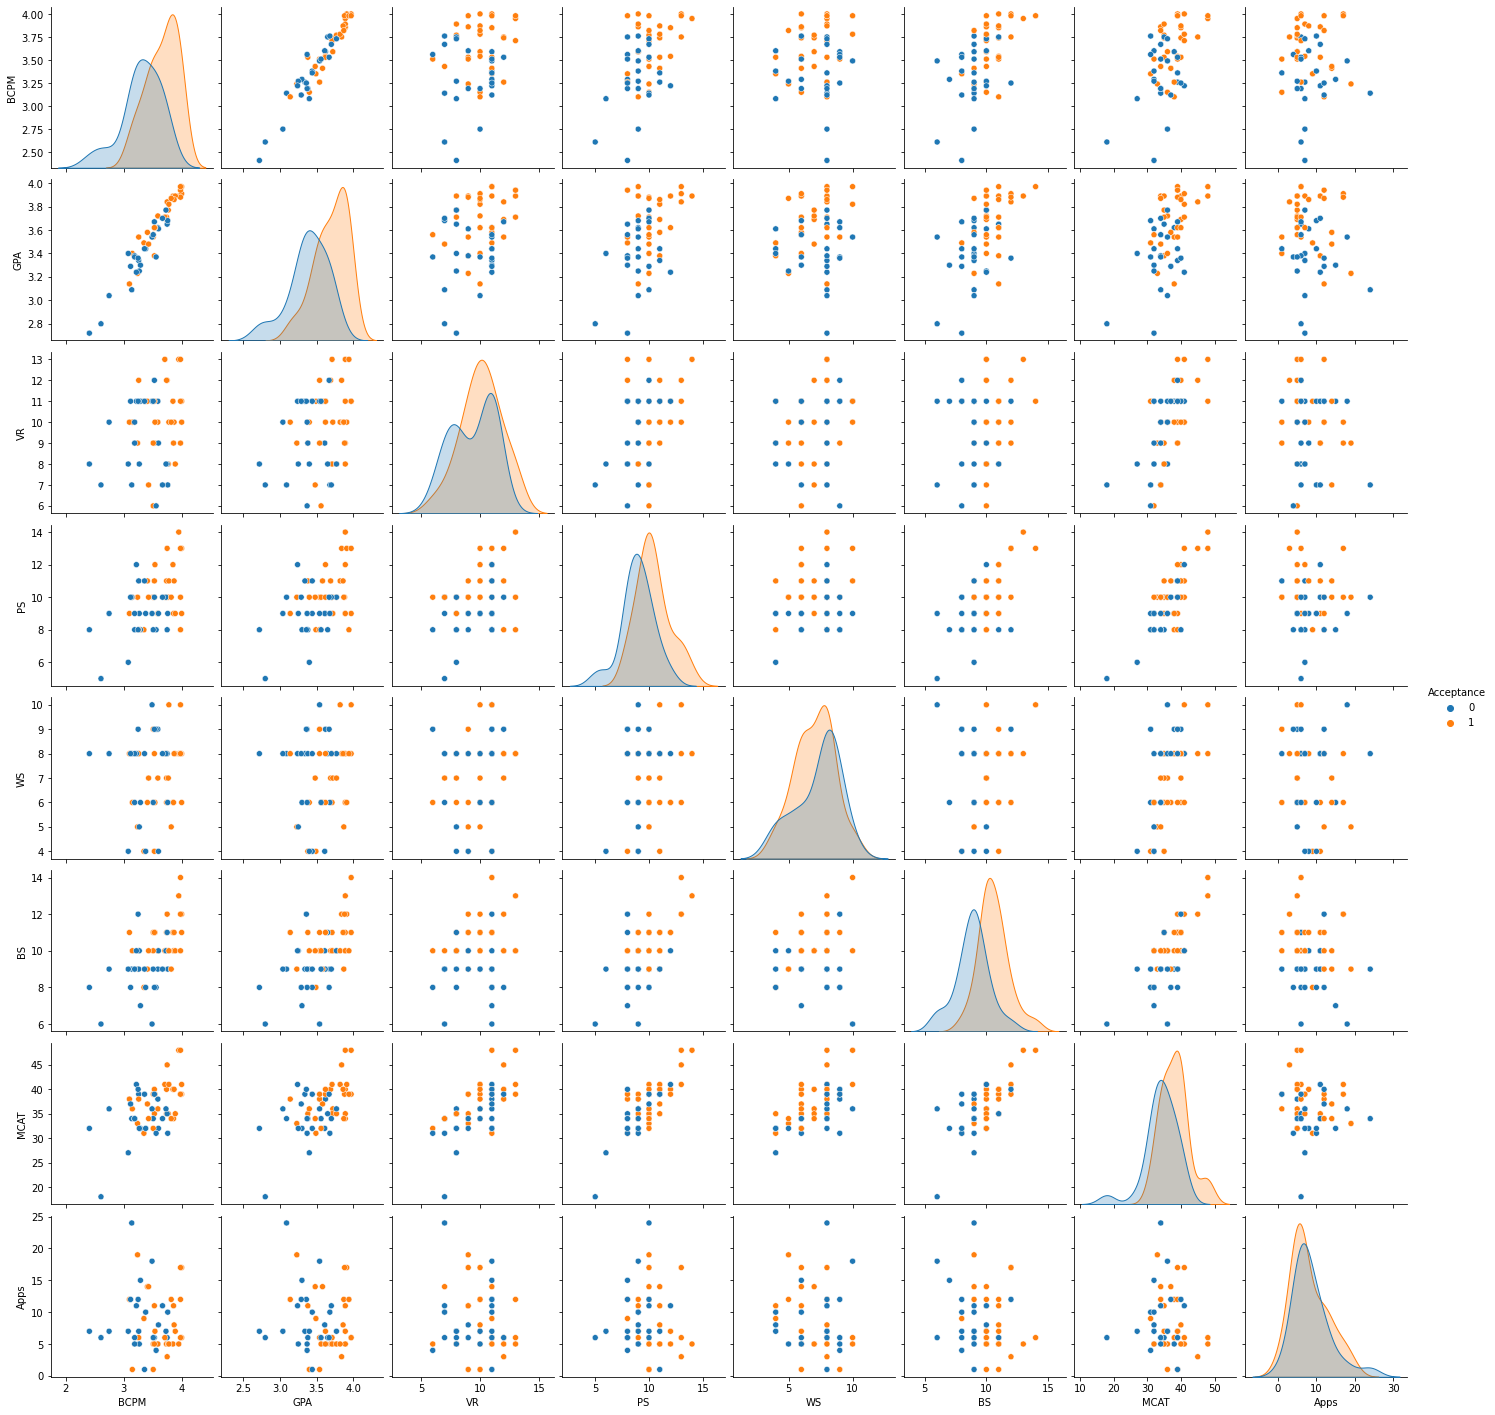

In [143]:
sns.pairplot(df.iloc[:, 1:], hue='Acceptance')

In [145]:
model = sm.Logit.from_formula('Acceptance ~ + Sex + BCPM + GPA + VR + PS + WS + BS + Apps', data=df)
rlt = model.fit()

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9


In [146]:
rlt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.5913
Time:                        11:15:15   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.429     -1.597      0.110      -5.085       0.518
BCPM          -6.1633      6.963     -0.885      0.376     -19.811       7.484
GPA           12.3973      8.611      1.440      0.150      -4.479      29.274
VR             0.0790      0.311      0.254      0.799      -0.530       0.688
PS             1.1673      0.539      2.164      0.030       0.110       2.225
WS            -0.7784      0.396     -1.968      0.049      -1.554      -0.003
BS             1.9184      0.682      2.814      0.005       0.582       3.255
Apps           0.0512      0.147      0.348      0.728      -0.237       0.340
==============================================================================
"""

In [150]:
pred_y = rlt.predict(df[['Sex', 'BCPM', 'GPA', 'VR', 'PS', 'WS' ,'BS', 'Apps']]) >= 0.5

In [160]:
y = df['Acceptance']

In [157]:
confusion_matrix(y, pred_y)

array([[22,  3],
       [ 3, 27]], dtype=int64)

In [161]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.90      0.90      0.90        30

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



In [162]:
fpr, tpr, thresholds = roc_curve(y, pred_y)

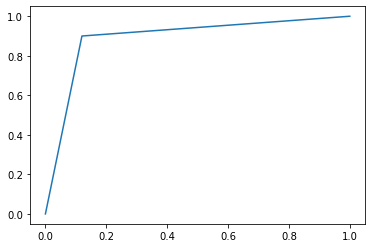

In [164]:
plt.plot(fpr, tpr)
plt.show()

In [165]:
auc(fpr, tpr)

0.89

In [175]:
df['predict'] = y

<AxesSubplot:xlabel='Acceptance', ylabel='predict'>

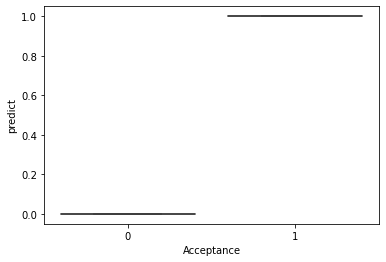

In [180]:
sns.boxplot(x='Acceptance', y='predict', data=df)

In [181]:
model = sm.Logit.from_formula('Acceptance ~ + PS + BS', data=df)
rlt = model.fit()

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7


In [182]:
rlt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.3315
Time:                        11:26:08   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.316      1.518      0.129      -0.140       1.099
BS             1.1464      0.387      2.959      0.003       0.387       1.906
==============================================================================
"""

In [185]:
pred_y = rlt.predict(df[['PS', 'BS']]) >= 0.5

In [186]:
confusion_matrix(y, pred_y)

array([[17,  8],
       [ 5, 25]], dtype=int64)

In [187]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.76      0.83      0.79        30

    accuracy                           0.76        55
   macro avg       0.77      0.76      0.76        55
weighted avg       0.76      0.76      0.76        55



In [ ]:
'''
로지스틱 예제 3: 아이리스
'''

In [189]:
iris = load_iris()

In [254]:
X, y = pd.DataFrame(iris['data'], columns=iris['feature_names']), pd.DataFrame(iris['target'], columns=['type'])
df = pd.concat([X, y], axis=1)
df = df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'})
df = df[df.type != 0]
df['type'] -=1
X = df.iloc[:,:-1]
y = df[['type']]

In [260]:
model = sm.Logit(y, sm.add_constant(X))
rlt = model.fit()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


In [261]:
rlt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   type   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.9142
Time:                        11:43:30   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal_width     -6.6809      4.480     -1.491      0.136     -15.461       2.099
petal_length     9.4294      4.737      1.990      0.047       0.145      18.714
petal_width     18.2861      9.743      1.877      0.061      -0.809      37.381
================================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [263]:
pred_y = rlt.predict(sm.add_constant(X)) >= 0.5

In [264]:
confusion_matrix(y, pred_y)

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [266]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



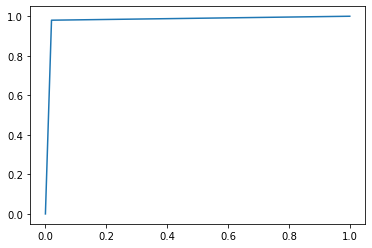

In [267]:
fpr, tpr, thresholds = roc_curve(y, pred_y)
plt.plot(fpr, tpr)
plt.show()

In [268]:
auc(fpr, tpr)

0.98